# Microsoft Malware Detection
## EDA and *ML* in progress

![](https://zeroproject.org/wp-content/uploads/2018/05/Microsoft.png)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRbuYMzpgoRh2tLUj_EVV0z7gtIKwfJfZ7G-DP5dscAvSqcgSR_OQ)

The malware industry continues to be a well-organized, well-funded market dedicated to evading traditional security measures. Once a computer is infected by malware, criminals can hurt consumers and enterprises in many ways.With more than one billion enterprise and consumer customers, Microsoft takes this problem very seriously and is deeply invested in improving security. As one part of their overall strategy for doing so, Microsoft is challenging the data science community to develop techniques to predict if a machine will soon be hit with malware. As with their previous, Malware Challenge (2015), Microsoft is providing Kagglers with an unprecedented malware dataset to encourage open-source progress on effective techniques for predicting malware occurrences.

### Goals
The goal of this competition is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine. The telemetry data containing these properties and the machine infections was generated by combining heartbeat and threat reports collected by Microsoft's endpoint protection solution, Windows Defender. Each row in this dataset corresponds to a machine, uniquely identified by a MachineIdentifier. HasDetections is the ground truth and indicates that Malware was detected on the machine. Using the information and labels in train.csv, you must predict the value for HasDetections for each machine in test.csv.

### Metric
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed label.

#### Initial thanks and inspirations for this kernel - sources:
- https://www.kaggle.com/theoviel/load-the-totality-of-the-data
- https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated

## Table of Contents
1. [Importing the Dataset](#importing_the_dataset)
2. [Inspecting the Dataset](#inspecting)
3. [Exploratory Data Analysis](#EDA)
4. [Machine Learning Modeling](#ML)

## ToDo: 
- add more comments
- Conclusion for Univariate, Bivariate and Multivariate plots
- Dive into Feature Engineering
- Experiments with NA_rate threshold, eta, number of estimators and xgboost parameters in general to improve auc

### Summary of Versions:
Until Version 22 I was playing around with EDA and trying to visualize as information as possible, unfortuately due to the enormous train set size which is almost 8GB I was working mainly with samples and trying to find ways to visualize as much information as I can. From version 22 and later versions of this Kernel, I was experimenting with Baseline XGboost and trying to find the optimal parameters via tuning. Feature Engineering still missing due to the fact that I dive into so much to tuning and trying to improve the classifier's performance and lost focus on other subjects but I will come back to that later. Tuning causes Kaggle to terminate my kernels due to timeout limitations. From Version #61 and so on I work with XGBoost classifers with optimal parameters found from my previous kernels. After the end of the competition and with the reveal of the private dataset, I am starting to suspect that my final tuned models are a bit overfitted and have to generalize.

#### Version History:
- Version 22, with 90% na_rate threshold, 10% train_sample / Public score: ** 0.656 **
- Version 23, with 90% na_rate threshold, 15% train_sample / Public score: ** 0.654 **
- Version 24, with 80% na_rate threshold, 15% train_sample / Public score: ** 0.655 **
- Version 25, with 80% na_rate threshold, 10% train_sample with better xgboost params / Public score: ** 0.661 **
- Version 26, with 80% na_rate threshold, 10% train_sample with better xgboost params / Public score: ** 0.661 **
- Version 27, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.1, 1000 estimators / Public score: ** 0.669 **
- Version 28, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 1000 estimators / Public score: ** 0.674 **
- Version 29, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 2000 estimators / Public score: ** 0.669 **
- Version 30, with 60% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 1000 estimators / Public score: ** 0.670 **
- Version 31, with 60% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 2000 estimators / Public score: ** 0.672 **
- Version 32, with 50% na_rate threshold, 10% train_sample with better xgboost params eta: 0.05, 1000 estimators / Public score: ** 0.666 **
- Version 33-34, with 70% na_rate threshold, 10% train_sample with better xgboost params eta: 0.1, 1000 estimators / Public score: ** 0.674 **
- Version 35-36-37, with 70% na_rate threshold, 10% Introducing Feature Engineering, with train_sample and with better xgboost params eta: 0.1, 1000 estimators / score: ** 0.659 ** 
- Version 38, with 70% na_rate threshold, 10% train_sample and with better xgboost params eta: 0.1, 1000 estimators and tuning / score: ** 0.671 **
- Version 39-40, with 70% na_rate threshold, 10% train_sample and with better xgboost params eta: 0.1, 1000 estimators and tuning / score: ** 0.670 **
- Version 41, with 70% na_rate threshold, 10% train_sample and with better xgboost params eta: 0.05, 2000 estimators and tuning / score: ** 0.673 ** 
- Version 42-43-44, with 70% na_rate threshold, 10% train_sample and with better xgboost tuning / score: ** 0.677 **
- Version 45, with 90% na_rate and unbalanced_features threshold, 12.5% train_sample and with better xgboost tuning / score: ** 0.664 IT HAS AN ERROR **
- Version 46-47-48, with 90% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA IT HAS AN ERROR **
- Version 49, with 90% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR **
- Version 50, (Like Version 49) with 90% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR  **
- Version 51, with 70% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR  **
- Version 52, with 70% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA, IT HAS AN ERROR **
- Version 53, with 90% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** 0.673  **
- Version 54, with 90% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA,  running longer than 9h  **
- Version 55, with 70% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 56, with 70% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 57, with 70% na_rate and 90% unbalanced_features threshold, 15% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 58, with 70% na_rate and 90% unbalanced_features threshold, 18.5% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 59, with 70% na_rate and 90% unbalanced_features threshold, 20% train_sample and with xgboost tuning / score: ** TBA, running longer than 9h  **
- Version 60, with 70% na_rate and 90% unbalanced_features threshold, 10% train_sample and with xgboost tuning / score: ** TBA  **
- Version 61, with 70% na_rate and 90% unbalanced_features threshold, 12.5% train_sample and with xgboost tuned / score: ** TBA  **
- Version 62, with 70% na_rate and 90% unbalanced_features threshold, 15% train_sample and with xgboost tuned / score: ** TBA  **
- Version 63, with 70% na_rate and 90% unbalanced_features threshold, 17.5% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 64, with 70% na_rate and 90% unbalanced_features threshold, 20% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 65, with 70% na_rate and 90% unbalanced_features threshold, 22.5% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 66-67-68, with 70% na_rate and 90% unbalanced_features threshold, 25% train_sample and with xgboost tuned / score: ** TBA, Exit with code -1  **
- Version 69, with 70% na_rate and 90% unbalanced_features threshold, 27.5% train_sample and with xgboost tuned / score: ** 0.674  **
- Version 70, with 70% na_rate and 90% unbalanced_features threshold, 30% train_sample and with xgboost tuned / score: ** 0.675  **
- Version 71-72-73, with 70% na_rate and 90% unbalanced_features threshold, 25% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** TBA  **
- Version 74-75, with 70% na_rate and 90% unbalanced_features threshold, 27.5% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** TBA  **
- Version 76, with 70% na_rate and 90% unbalanced_features threshold, 30% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** TBA  **
- Version 77, with 70% na_rate and 90% unbalanced_features threshold, 32.5% train_sample and with xgboost tuned and reduced reg_alpha and lambda / score: ** 0.672  **
- Version 78-79, Returning after the end of the competition to polish the Kernel, with 90% na_rate and 90% unbalanced_features threshold, 15% train_sample and with xgboost tuned / score: ** TBA  **


### Version Summary:
Until Version 22 I was playing around with EDA and trying to visualize as information as possible, unfortuately due to the enormous train set size which is almost 8GB I was working mainly with samples and trying to find ways to visualize as much information as I can. From version 22 and later versions of this Kernel, I was experimenting with Baseline XGboost and trying to find the optimal parameters via tuning. Feature Engineering still missing due to the fact that I dive into so much to tuning and trying to improve the classifier's performance and lost focus on other subjects but I will come back to that later. Tuning causes Kaggle to terminate my kernels due to timeout limitations. From Version #61 and so on I work with XGBoost classifers with optimal parameters found from my previous kernels. Moreover, I am starting to believe that the 2 thresholds, na_rate and unbalanced_feature_rate_threshold must be both set to 0.9.

### Thoughts about Feature Engineering:
In order to know if a newly introduced feature may affect positevely or negatively the dataset I have to cross validate both with and without an xgboost model and measure its performance.


## My train of thought is the following:
The following Kernel Will perform:
- Importing the dataset
- EDA
- Feature Engineering
- Machine Learning Modeling

There is another Kernel for parameter tuning and another of blending CV predictions.
1. [XGBoost Tuning](https://www.kaggle.com/praxitelisk/microsoft-malware-detection-xgboost-tuning)
2. [XGBoost Blending CV Predictions](https://www.kaggle.com/praxitelisk/microsoft-malware-detection-xgboost-blends)

The order for Machine Learning predictions is as depicted from the flowchart:
1. Use this kernel for EDA, Feature Engineering and Baseline Modeling
2. Then tune the baseline model
3. Finally Blend Predictions from Cross Validations.

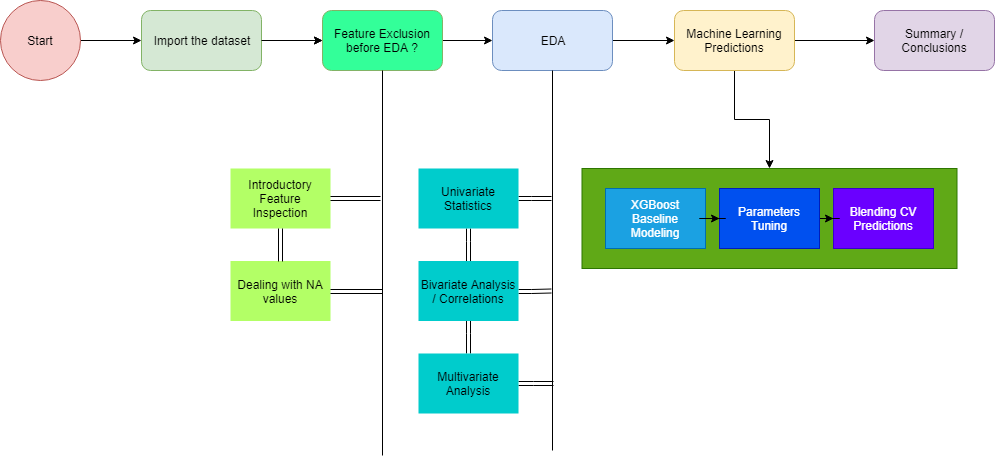

### *Due to memory limitations both EDA and Machine Learning will be performed with a representative sample from the whole train set. Approximately 15% from the train set will be used for EDA and 15% sample from the whole train set will be used from ML modeling.*

<a id="importing_the_dataset"></a>
## Importing the Dataset

In [ ]:
# source code https://www.kaggle.com/praxitelisk/microsoft-malware-detection-eda-xgboost
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/microsoft-malware-prediction"))

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

plt.style.use('fivethirtyeight')

import time


# due to Kaggle memory limitations and the enormous dataset size, a sample from the whole
# trainset will be used for ML modeling
train_sample_fraction = None


# another global variable that must be defined is the NA values rate / theshold to ommit columns with
# NA values that pass this rate
na_rate_threshold = 0.9

# if we want to avoid using a fraction of the train dataset then using the following variable will suffice
train_sample_num = 1500000

# theshold to remove columns with unbalanced features to their values 
unbalanced_feature_rate_threshold = 0.9

# Any results you write to the current directory are saved as output.

The data is quite big here, and all of it cannot be loaded at once with a simple read_csv call.
A solution is to specify types, to gain memory (for example switching from float64 to float32)

In [ ]:
# I am grateful for the help of author of this kernel for the main idea to load the dataset and save memory space!!
# https://www.kaggle.com/theoviel/load-the-totality-of-the-data

dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
# to be deleted this cell
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_and_binary_columns = [c for c,v in dtypes.items() if v in numerics]


In [ ]:
%%time
train = pd.read_csv('../input/microsoft-malware-prediction/train.csv', dtype=dtypes)

In [ ]:
%%time
test = pd.read_csv('../input/microsoft-malware-prediction/test.csv', dtype=dtypes)

In [ ]:
# Special thanks to https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated
#train = reduce_mem_usage(train)

<a id="inspecting"></a>
## Introductory Inspection for the train set and its features

In [ ]:
train.info()

In [ ]:
test.info()

We can see that we have already a mix of numerical and categorical features.

In [ ]:
train.describe()

In [ ]:
test.describe()

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
data_train=train.dropna(how="any",axis=0)
data_train.head()

In [ ]:
data_test=test.dropna(how="any",axis=0)
data_test.head()

We have a wide variety of data. most of them appear to have NaN values, we have to thoroughly inspect them.

We have many features and lots of them have NA values, an idea is to ditch features that have many NA values bacause they do not provide any information that may be useful for the analysis.

In [ ]:
# special thanks to https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated

stats = []
for col in train.columns:
    stats.append((col, train[col].dtype, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100))
    
stats_df = pd.DataFrame(stats, columns=['Feature', "type", 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category'])

stats_df.sort_values('Percentage of missing values', ascending=False)

### Remove columns with high * **NA** * rate threshold and high * **one category** * values only
removing colums with NA rate more than * ** 70%** * threshold and * ** 90%  ** * features with one category only.

In [ ]:
good_cols = list(train.columns)

for col in train.columns:
    
    # remove columns with high NA rate
    na_rate = train[col].isnull().sum() / train.shape[0]
    
    # remove columns with high Unbalanced values rate
    unbalanced_rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    
    if na_rate > na_rate_threshold:
        good_cols.remove(col)
    elif unbalanced_rate > unbalanced_feature_rate_threshold:
        good_cols.remove(col)

In [ ]:
good_cols

In [ ]:
print("train data set reduced size in memory:", train.memory_usage().sum() / (1000000000))

In [ ]:
train = train[good_cols]

### Delete some variables to free memory space.

In [ ]:
del stats_df

### Call garbage collector

In [ ]:
import gc

gc.collect()

<a id="EDA"></a>
## Exploratory Data Analysis

![](http://blog.k2analytics.co.in/wp-content/uploads/2016/12/Exploratory_Data_Analysis.png)

### Let's print out and take a look at the header frame

In [ ]:
train.head()

### Train Set dimensions

In [ ]:
train.shape

### Target

In [ ]:
train['HasDetections'].value_counts()

In [ ]:
train['HasDetections'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

#### The target is balanced, which is nice.

### Seperate the categorical and the numerical columns in the Train Set
MachineIdentifier is a unique ID and does not play any role to the analysis.

In [ ]:
categorical_columns = list(train.loc[:, train.dtypes =="category"].columns)
numerical_and_binary_columns = list(train.loc[:, train.dtypes !="category"].columns)
numerical_columns = numerical_and_binary_columns

categorical_columns.remove("MachineIdentifier")

binary_columns = []
for col in (numerical_and_binary_columns):
    if train[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

### The Majority of types of features

In [ ]:
#print(len(categorical_columns))
#print(len(numerical_columns))
#print(len(binary_columns))

categories_list = []
categories_list.append(len(categorical_columns))
categories_list.append(len(numerical_columns))
categories_list.append(len(binary_columns))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary_features"])

categories_df = categories_df.transpose().plot(kind="barh", figsize=(21, 10), title="number of different features")

### * Due to memory limitations, a small sample between 10% to 13% from the whole trainset will be used for Univariate, Bivariate and Multivariate plots *

In [ ]:
if train_sample_fraction is not None:
    train_sample = train.sample(frac=train_sample_fraction, random_state=42)
elif train_sample_num is not None:
    train_sample = train.sample(n=train_sample_num, random_state=42)
else:
    train_sample = train.sample(n=1500000, random_state=42)

gc.collect()

In [ ]:
categorical_columns

### Univariate Analysis - Barplots for the categorical features
#### Inspecting each one of the categorical features from the train set and illustrating the top most occured categories per categorical feature against the *HasDetections* target variable. Moreover trying to fit a logistic regression model between the target variable and the inspected feature to identify if the feature is a good predictor.

In [ ]:
def categorical_univariate_and_bivariate_stats(feature):
    
    if feature in train_sample.columns:
    
        print("Top 10 most occurred categories for the categorical feature", feature)
        print(train_sample[feature].value_counts().head(10))

        f, axes = plt.subplots(1, 2, figsize=(21, 10))

        train_sample[feature].value_counts().head(10).plot.bar(ax=axes[0], colormap="BrBG")

        train_sample.groupby(["HasDetections", feature]).count()["MachineIdentifier"].unstack(0).sort_values(by=1, axis=0, ascending=False).head(10).plot.bar(ax=axes[1], colormap="coolwarm")
        
        f.suptitle("Categorical feature: "+" Univariate and Bivariate plots against the target variable")
        
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")
        
        
def logistic_fit(feature):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import r2_score

    if feature in train_sample.columns:
        
        from sklearn.linear_model import LogisticRegression
        
        f, axes = plt.subplots(1, 2, figsize=(21, 10))

        # test if there is a logistic relationship between the feature1 and the target.
        print()
        print("Fitting a logistic regression model for the feature", feature,"against the target variable")
        
               
        mask = ~train_sample[feature].isnull() & ~train_sample["HasDetections"].isnull()

        logmodel = LogisticRegression(C=1e5, solver='lbfgs')
        
        if feature in categorical_columns:        
            logmodel.fit(train_sample[feature][mask].cat.codes.values.reshape(-1,1), train_sample["HasDetections"][mask])
            predictions = logmodel.predict(train_sample[feature][mask].cat.codes.values.reshape(-1,1))
        else:
            logmodel.fit(train_sample[feature][mask].values.reshape(-1,1), train_sample["HasDetections"][mask])
            predictions = logmodel.predict(train_sample[feature][mask].values.reshape(-1,1))

        from sklearn.metrics import classification_report
        print(classification_report(train_sample["HasDetections"][mask], predictions))
        print("")
        print("accuracy score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        print("F1 score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        #print("R^2 score:", r2_score(train_sample["HasDetections"][mask], predictions))

        import scikitplot as skplt
        skplt.metrics.plot_confusion_matrix(train_sample["HasDetections"][mask], predictions, normalize=False,
                                            title = "Confusion matrix for the feature: "+feature+" against the target variable after fitting a logistic regression model",
                                           figsize=(10,8), text_fontsize='medium', cmap="BrBG", ax = axes[0])
        
        
        # import statsmodels.api as sm
        # print()
        # est = sm.Logit(train_sample["HasDetections"][mask], train_sample[feature][mask].cat.codes.values.reshape(-1,1))
        # result1=est.fit()
        # print(result1.summary())
        if feature in categorical_columns:
            axes[1] = plt.scatter(train_sample[feature][mask].cat.codes.values.reshape(-1,1), predictions)
            axes[1] = plt.scatter(train_sample[feature][mask].cat.codes.values.reshape(-1,1), logmodel.predict_proba(train_sample[feature][mask].cat.codes.values.reshape(-1,1))[:,1])
            plt.xlabel(feature)
            plt.ylabel("HasDetections Probability")
            plt.title("Probability of Detecting a Malware vs the "+ feature)
            plt.show()
        else:
            axes[1] = plt.scatter(train_sample[feature][mask].values.reshape(-1,1), predictions)
            axes[1] = plt.scatter(train_sample[feature][mask].values.reshape(-1,1), logmodel.predict_proba(train_sample[feature][mask].values.reshape(-1,1))[:,1])
            plt.xlabel(feature)
            plt.ylabel("HasDetections Probability")
            plt.title("Probability of Detecting a Malware vs the "+ feature)
            plt.show()
        
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")



In [ ]:
categorical_univariate_and_bivariate_stats(feature="ProductName")
logistic_fit(feature="ProductName")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="EngineVersion")
logistic_fit(feature="EngineVersion")

We can see that 2 engine versions, "1.1.15200.1" and "1.1.15100.1" is at high frequencies than the rest engine versions. However the version "1.1.15100.1" has more Malware Detections than the rest of the categoeris. Just out of curiosity, fitting a logistic regression for binary classification for this feature against the target variable, It detects the infected systems with precision. However the model is very weak due to its low accuracy and high recall scores, but it can at least predict the infected systems with great precision.

In [ ]:
categorical_univariate_and_bivariate_stats(feature="AppVersion")
logistic_fit(feature="AppVersion")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="AvSigVersion")
logistic_fit(feature="AvSigVersion")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Platform")
logistic_fit(feature="Platform")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Processor")
logistic_fit(feature="Processor")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="OsVer")
logistic_fit(feature="OsVer")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="OsPlatformSubRelease")
logistic_fit(feature="OsPlatformSubRelease")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="OsBuildLab")
logistic_fit(feature="OsBuildLab")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="SmartScreen")
logistic_fit(feature="SmartScreen")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_MDC2FormFactor")
logistic_fit(feature="Census_MDC2FormFactor")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_ChassisTypeName")
logistic_fit(feature="Census_ChassisTypeName")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_PowerPlatformRoleName")
logistic_fit(feature="Census_PowerPlatformRoleName")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_InternalBatteryType")
logistic_fit(feature="Census_InternalBatteryType")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_OSVersion")
logistic_fit(feature="Census_OSVersion")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_OSArchitecture")
logistic_fit(feature="Census_OSArchitecture")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_OSBranch")
logistic_fit(feature="Census_OSBranch")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_OSEdition")
logistic_fit(feature="Census_OSEdition")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_OSSkuName")
logistic_fit(feature="Census_OSSkuName")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_OSInstallTypeName")
logistic_fit(feature="Census_OSInstallTypeName")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_OSWUAutoUpdateOptionsName")
logistic_fit(feature="Census_OSWUAutoUpdateOptionsName")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_GenuineStateName")
logistic_fit(feature="Census_GenuineStateName")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_ActivationChannel")
logistic_fit(feature="Census_ActivationChannel")

In [ ]:
categorical_univariate_and_bivariate_stats(feature="Census_FlightRing")
logistic_fit(feature="Census_FlightRing")

In [ ]:
gc.collect()

### Numerical Columns Univariate and Bivariate Plots against the taget variable

#### Inspecting each one of the numerical features from the train set and illustrating the top most occured values against the *HasDetections* target variable. Moreover trying to fit a logistic regression model between the target variable and the inspected feature to identify if the feature is a good predictor.

In [ ]:
numerical_and_binary_columns

In [ ]:
def numerical_univariate_and_bivariate_plot(feature, num_of_bins = 40):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    
    if feature in train_sample.columns:
    
        print("Top 10 Values counts for the numerical feature", feature)
        print(train_sample[feature].value_counts().head(10))
        print("Min value", train_sample[feature].min())
        print("Max value", train_sample[feature].max())
        print("NaN values", train_sample[feature].isnull().sum())
        print("Number of unique values", train_sample[feature].nunique())

        if train[feature].nunique() > 2:
            print("Mean value", train_sample[feature].mean())
            print("Variance value", train_sample[feature].var())

        # for binary features
        if train[feature].nunique() <= 2:

            f, axes = plt.subplots(1, 2, figsize=(21, 10))

            sns.countplot(x=feature, data=train_sample, ax=axes[0])
            sns.countplot(x=feature, hue = "HasDetections", data=train_sample, ax=axes[1], palette=['b','r'])
            
            f.suptitle("Numerical feature: "+feature+" Univariate and Bivariate plots against the target variable")

        # for numeric features
        else:

            f, axes = plt.subplots(1, 3, figsize=(21, 10))

            sns.distplot(train_sample[feature].dropna(), rug=False, kde=False, ax=axes[0], bins = num_of_bins)

            sns.violinplot(x="HasDetections", y = feature, hue="HasDetections", data=train_sample, ax=axes[1], palette=['b','r'])

            if feature == "LocaleEnglishNameIdentifier":
                sns.distplot(train_sample[train_sample["HasDetections"] == 0][feature].dropna().astype("int16"), rug=False, kde=False, color="b", ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["HasDetections"] == 1][feature].dropna().astype("int16"), rug=False, kde=False, color="r", ax=axes[2], bins = num_of_bins)
            else:
                sns.distplot(train_sample[train_sample["HasDetections"] == 0][feature].dropna(), rug=False, kde=False, color="b", ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["HasDetections"] == 1][feature].dropna(), rug=False, kde=False, color="r", ax=axes[2], bins = num_of_bins)
            
                f.suptitle("Numerical feature: "+feature+" Univariate and Bivariate plots against the target variable")
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")




In [ ]:
numerical_univariate_and_bivariate_plot(feature = "IsBeta")

In [ ]:
numerical_univariate_and_bivariate_plot(feature="RtpStateBitfield")
logistic_fit("RtpStateBitfield")

In [ ]:
numerical_univariate_and_bivariate_plot(feature="IsSxsPassiveMode")
logistic_fit("IsSxsPassiveMode")

In [ ]:
numerical_univariate_and_bivariate_plot(feature="AVProductStatesIdentifier")
logistic_fit("AVProductStatesIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot(feature="AVProductsInstalled")
logistic_fit("AVProductsInstalled")

In [ ]:
numerical_univariate_and_bivariate_plot("HasTpm")
logistic_fit("HasTpm")

In [ ]:
numerical_univariate_and_bivariate_plot("CountryIdentifier")
logistic_fit("CountryIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("CityIdentifier")
logistic_fit("CityIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("OrganizationIdentifier")
logistic_fit("OrganizationIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("GeoNameIdentifier")
logistic_fit("GeoNameIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("LocaleEnglishNameIdentifier")
logistic_fit("LocaleEnglishNameIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("OsBuild")
logistic_fit("OsBuild")

In [ ]:
numerical_univariate_and_bivariate_plot("OsSuite")
logistic_fit("OsSuite")

In [ ]:
numerical_univariate_and_bivariate_plot("IsProtected")
logistic_fit("IsProtected")

In [ ]:
numerical_univariate_and_bivariate_plot("AutoSampleOptIn")
logistic_fit("AutoSampleOptIn")

In [ ]:
numerical_univariate_and_bivariate_plot("SMode")
logistic_fit("SMode")

In [ ]:
numerical_univariate_and_bivariate_plot("IeVerIdentifier")
logistic_fit("IeVerIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Firewall")
logistic_fit("Firewall")

In [ ]:
numerical_univariate_and_bivariate_plot("UacLuaenable")
logistic_fit("UacLuaenable")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_OEMNameIdentifier")
logistic_fit("Census_OEMNameIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_OEMModelIdentifier")
logistic_fit("Census_OEMModelIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_ProcessorCoreCount")
logistic_fit("Census_ProcessorCoreCount")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_ProcessorManufacturerIdentifier")
logistic_fit("Census_ProcessorManufacturerIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_ProcessorModelIdentifier")
logistic_fit("Census_ProcessorModelIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_PrimaryDiskTotalCapacity")
logistic_fit("Census_PrimaryDiskTotalCapacity")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_SystemVolumeTotalCapacity")
logistic_fit("Census_SystemVolumeTotalCapacity")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_HasOpticalDiskDrive")
logistic_fit("Census_HasOpticalDiskDrive")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_TotalPhysicalRAM")
logistic_fit("Census_TotalPhysicalRAM")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_InternalPrimaryDiagonalDisplaySizeInInches")
logistic_fit("Census_InternalPrimaryDiagonalDisplaySizeInInches")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_InternalPrimaryDisplayResolutionHorizontal")
logistic_fit("Census_InternalPrimaryDisplayResolutionHorizontal")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_InternalPrimaryDisplayResolutionVertical")
logistic_fit("Census_InternalPrimaryDisplayResolutionVertical")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_InternalBatteryNumberOfCharges")
logistic_fit("Census_InternalBatteryNumberOfCharges")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_OSBuildNumber")
logistic_fit("Census_OSBuildNumber")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_OSBuildRevision")
logistic_fit("Census_OSBuildRevision")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_OSInstallLanguageIdentifier")
logistic_fit("Census_OSInstallLanguageIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_OSUILocaleIdentifier")
logistic_fit("Census_OSUILocaleIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_IsPortableOperatingSystem")
logistic_fit("Census_IsPortableOperatingSystem")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_IsFlightingInternal")
logistic_fit("Census_IsFlightingInternal")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_IsFlightsDisabled")
logistic_fit("Census_IsFlightsDisabled")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_ThresholdOptIn")
logistic_fit("Census_ThresholdOptIn")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_FirmwareManufacturerIdentifier")
logistic_fit("Census_FirmwareManufacturerIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_FirmwareManufacturerIdentifier")
logistic_fit("Census_FirmwareManufacturerIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_FirmwareVersionIdentifier")
logistic_fit("Census_FirmwareVersionIdentifier")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_IsSecureBootEnabled")
logistic_fit("Census_IsSecureBootEnabled")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_IsWIMBootEnabled")
logistic_fit("Census_IsWIMBootEnabled")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_IsVirtualDevice")
logistic_fit("Census_IsVirtualDevice")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_IsTouchEnabled")
logistic_fit("Census_IsTouchEnabled")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_IsPenCapable")
logistic_fit("Census_IsPenCapable")

In [ ]:
numerical_univariate_and_bivariate_plot("Census_IsAlwaysOnAlwaysConnectedCapable")
logistic_fit("Census_IsAlwaysOnAlwaysConnectedCapable")

In [ ]:
numerical_univariate_and_bivariate_plot("Wdft_IsGamer")
logistic_fit("Wdft_IsGamer")

In [ ]:
numerical_univariate_and_bivariate_plot("Wdft_RegionIdentifier")
logistic_fit("Wdft_RegionIdentifier")

In [ ]:
gc.collect()

### Correlations in Numerical Features
Trying to find corellations between numerical features

In [ ]:
start_time = time.time()

sns.set(rc={'figure.figsize':(34.7,39.27)})

# Compute the correlation matrix
corr = train[numerical_and_binary_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')

print("elapsed time:", time.time() - start_time, "seconds")

Data correlation is the way in which one set of data may correspond to another set. In ML, think of how your features correspond with your output.

### Most correlated features

In [ ]:
s = corr.unstack().drop_duplicates()
so = s.sort_values(kind="quicksort")

print("Top most highly megative correlated features:")
print(so[(so<-0.4)])
print()

print("Top most highly positive correlated features:")
print(so[(so<1) & (so>0.5)].sort_values(ascending=False))

### Delete Variables

In [ ]:
del corr
del mask
del s
del so
gc.collect()

### Multivariate - Trivariate Analysis between highly correlated features and against the target variable; "HasDetections".
#### Inspecting the relationship between highly correlated features. Moreover trying to fit a logistic regression model between the target variable and the inspected features to identify if the features are good predictors.

In [ ]:
%%time
def multivariate_plot(feature1, feature2):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    
    # check if one of the two features exists in train_sample columns
    if (feature1 not in train_sample.columns) | (feature2 not in train_sample.columns):
        if (feature1 not in train_sample.columns):
            print(feature1, "has been removed due to high NA rate or highly unbalanced values")
        elif (feature2 not in train_sample.columns):
            print(feature2, "has been removed due to high NA rate or higlhy unbalanced values")
        print()
            
    else:
        
        f, axes = plt.subplots(1, 2, figsize=(21, 10))
        
        # Due to overflow error I have to convert some columns into a bigger data type
        if (feature1 == "LocaleEnglishNameIdentifier") & (feature2 == "Census_OSUILocaleIdentifier"):
            g1 = sns.scatterplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('int16'), y=train_sample["Census_OSUILocaleIdentifier"], hue = train_sample["HasDetections"], ax = axes[0])
            #g1 = sns.jointplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('int16'), y=train_sample["Census_OSUILocaleIdentifier"], height=9, data = train)
            
            plt.title('Scatterplot Between: '+feature1+" and "+feature2, y=1.3, fontsize = 9)
            
        elif (feature1 == "LocaleEnglishNameIdentifier") & (feature2 == "Census_OSInstallLanguageIdentifier"):
            g1 = sns.scatterplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('float16'), y=train_sample["Census_OSInstallLanguageIdentifier"], hue = train_sample["HasDetections"], ax = axes[0])
            #g1 = sns.jointplot(x=train_sample["LocaleEnglishNameIdentifier"].astype('float16'), y=train_sample["Census_OSInstallLanguageIdentifier"], height=9, data = train)
            
            plt.title('Scatterplot Between: '+feature1+" and "+feature2, y=1.3, fontsize = 9)
        else:    
            g1 = sns.scatterplot(x=train_sample[feature1], y=train_sample[feature2], hue = train_sample["HasDetections"], ax = axes[0])
            
            axes[0].set_title('Scatterplot Between: '+feature1+" and "+feature2)

        #g2 = sns.lmplot(x=feature1, y=feature2, hue="HasDetections", n_boot=1, data = train_sample, height=9, markers=["o", "x"], palette=["b", "r"])
        #g2 = sns.jointplot(x=feature1, y=feature2, data = train_sample, hue = "HasDetections", height=9)
        #g2 = sns.scatterplot(x=feature1, y=feature2, data = train_sample, hue = "HasDetections")
        
        #plt.title('Scatterplot Between: '+feature1+" and "+feature2+" against the target variable: 'HasDetections'", y=1.1, fontsize = 16)
        
        
        # fitting a logistic regression model with the 2 features
        
        # test if there is a logistic relationship between the feature1 and the target.
        
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import precision_score
        from sklearn.metrics import recall_score
        from sklearn.metrics import f1_score
        from sklearn.metrics import r2_score
        
        from sklearn.linear_model import LogisticRegression
        
        print()
        print("Fitting a logistic regression model for the features", feature1,"and",feature2,"against the target variable")
        
        mask = ~train_sample[feature1].isnull() & ~train_sample[feature2].isnull() & ~train_sample["HasDetections"].isnull()

        logmodel = LogisticRegression()
        
        logmodel.fit(train_sample[[feature1, feature2]][mask].values, train_sample["HasDetections"][mask])
        predictions = logmodel.predict(train_sample[[feature1, feature2]][mask].values)

        from sklearn.metrics import classification_report
        print(classification_report(train_sample["HasDetections"][mask], predictions))
        print("")
        print("accuracy score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        print("F1 score:", accuracy_score(train_sample["HasDetections"][mask], predictions))
        #print("R^2 score:", r2_score(train_sample["HasDetections"][mask], predictions))
        
        
        g2 = sns.scatterplot(x=train_sample[feature1][mask].values, y=train_sample[feature2][mask].values, hue = predictions, ax=axes[1])
        axes[1].set_title('Logistic Predictions Between: '+feature1+" and "+feature2)

        import scikitplot as skplt
        skplt.metrics.plot_confusion_matrix(train_sample["HasDetections"][mask], predictions, normalize=False,
                                            title = "Confusion matrix for two features: "+feature1+" and "+feature2+" against the target variable after fitting a logistic regression model",
                                           figsize=(10,8), text_fontsize='large', cmap="BrBG")
        

        #### my mistake, how can I fit a linear model for binary classification, I have to use here logistic regression as before :D
        
        # old code in comments
        '''
        ### test if a linear model will fit the 2 correlated feature against the target variable
        # my thanks to: https://www.datasciencecentral.com/profiles/blogs/linear-regression-in-python-use-of-numpy-scipy-and-statsmodels
        # this link helped me a lot https://stackoverflow.com/questions/13643363/linear-regression-of-arrays-containing-nans-in-python-numpy
        
        
        # test if there is a linear relationship between the feature1 and the target.
        from scipy import stats
        mask = ~np.isnan(train_sample[feature1]) & ~np.isnan(train_sample["HasDetections"])
        slope, intercept, r_value, p_value, std_err = stats.linregress(train_sample[feature1][mask], train_sample["HasDetections"][mask])

        sign='+'
        if slope<0:
            sign = ''
        
        lm_1 = "linear regression function #1: y = "+str(np.round(intercept,5))+" "+sign +" "+str(np.round(slope,5))+" * "+feature1
        lm_1 = lm_1+"\n"+" p-value: "+str(p_value)+"\n"+" R^2: "+str(r_value)
        #print(lm_1)
        #print(feature1, "p-value",p_value)
        #print("R^2:", r_value)

        #print()

        # test if there is a linear relationship between the feature2 and the target.
        mask = ~np.isnan(train_sample[feature2]) & ~np.isnan(train_sample["HasDetections"])
        slope, intercept, r_value, p_value, std_err = stats.linregress(train_sample[feature2][mask], train_sample["HasDetections"][mask])

        sign='+'
        if slope<0:
            sign=''
        
        lm_2 = "linear regression function #2: y = "+str(np.round(intercept,5))+" "+sign +" "+str(np.round(slope,5))+" * "+feature2
        lm_2 = lm_2+"\n"+" p-value: "+str(p_value)+"\n"+" R^2: "+str(r_value)
        #print(lm_2)
        #print(feature2, "p-value",p_value)
        #print("R^2:", 100* r_value)
        
        plt.figure(figsize=(8, 9))
        ax = plt.subplot(121)
    
        # plotting text with matplotlib:
        # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html
        plt.text(0.5, 0.9, lm_1, size=15, ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )
        
        
        plt.text(0.5, 0.6, lm_2, size=15, ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )

        plt.axis('off')
        plt.show()
        '''

    

In [ ]:
%%time
multivariate_plot("RtpStateBitfield", "IsSxsPassiveMode")
gc.collect()

In [ ]:
%%time
multivariate_plot("AVProductStatesIdentifier", "AVProductsInstalled")
gc.collect()

In [ ]:
%%time
multivariate_plot("Census_OSBuildNumber", "Census_OSBuildRevision")
gc.collect()

In [ ]:
%%time
multivariate_plot("OsBuild", "Census_OSBuildRevision")
gc.collect()

In [ ]:
%%time
multivariate_plot("HasTpm", "IeVerIdentifier")
gc.collect()

In [ ]:
%%time
multivariate_plot("LocaleEnglishNameIdentifier", "Census_OSUILocaleIdentifier")
gc.collect()

In [ ]:
%%time
multivariate_plot("Census_InternalBatteryNumberOfCharges", "Census_FirmwareManufacturerIdentifier")
gc.collect()

In [ ]:
%%time
multivariate_plot("LocaleEnglishNameIdentifier", "Census_OSInstallLanguageIdentifier")
gc.collect()

In [ ]:
%%time
multivariate_plot("Census_OEMModelIdentifier", "Census_FirmwareManufacturerIdentifier")
gc.collect()

In [ ]:
%%time
multivariate_plot("Census_OEMNameIdentifier", "Census_FirmwareVersionIdentifier")
gc.collect()

<a id="ML"></a>
## Machine Learning modeling

![](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)

As we saw, linear relationships are really weak, thus Classification Trees will find patterns of relations between the target variable with the features.

### Delete Train set, to free up memory space.

In [ ]:
del train
gc.collect()

### Reading the test data

In [ ]:
test_dtypes = {k: v for k, v in dtypes.items() if k in good_cols}

# get all columns except
test = pd.read_csv('../input/microsoft-malware-prediction/test.csv', dtype=test_dtypes, usecols=good_cols[:-1])

#test = reduce_mem_usage(test)

In [ ]:
test.head()

In [ ]:
test.shape

### Feature Engineering

In [ ]:
new = train_sample["OsBuildLab"].str.split(".", expand = True)
train_sample["OsBuildLab_1"] = new[2]

new = test["OsBuildLab"].str.split(".", expand = True)
test["OsBuildLab_1"] = new[2]


categorical_columns.append("OsBuildLab_1")
del new

#special thanks to https://www.kaggle.com/delayedkarma/let-s-add-some-new-features-lb-0-674

#train_sample['new_num_1'] = train_sample['Census_TotalPhysicalRAM'] * train_sample['Census_InternalPrimaryDiagonalDisplaySizeInInches']
#test['new_num_1'] = test['Census_TotalPhysicalRAM'] * test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

#train_sample['new_num_2'] = train_sample['Census_ProcessorCoreCount'] * train_sample['Census_InternalPrimaryDiagonalDisplaySizeInInches']
#test['new_num_2'] = test['Census_ProcessorCoreCount'] * test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

#train_sample['new_num_3'] = train_sample['Census_ProcessorCoreCount'] * train_sample['Census_TotalPhysicalRAM']
#test['new_num_3'] = test['Census_ProcessorCoreCount'] * test['Census_TotalPhysicalRAM']

#train_sample['new_num_4'] = train_sample['Census_PrimaryDiskTotalCapacity'] * train_sample['Census_TotalPhysicalRAM']
#test['new_num_4'] = test['Census_PrimaryDiskTotalCapacity'] * test['Census_TotalPhysicalRAM']

#train_sample['new_num_5'] = train_sample['Census_SystemVolumeTotalCapacity'] * train_sample['Census_InternalPrimaryDiagonalDisplaySizeInInches']
#test['new_num_5'] = test['Census_SystemVolumeTotalCapacity'] * test['Census_InternalPrimaryDiagonalDisplaySizeInInches']

### Drop the unique "MachineIdentifier" Identifiers

In [ ]:
train_sample = train_sample.drop(['MachineIdentifier'], axis=1)
test = test.drop(['MachineIdentifier'], axis=1)

In [ ]:
train_sample = train_sample.reset_index(drop=True)

### Filling NA values with the statistical Mode

In [ ]:
modes = train_sample.mode()

for col in train_sample.columns:
    train_sample[col] = np.where(train_sample[col].isnull(), modes[col], train_sample[col])

del modes

In [ ]:
modes_test = test.mode()

for col in test.columns:
    test[col] = np.where(test[col].isnull(), modes_test[col], test[col])

#train_sample.shape
del modes_test

### Concatenate both train_sample and test sets before label encoding

In [ ]:
train_shape = train_sample.shape
test_shape = test.shape

train_and_test = pd.concat([train_sample,test], axis="rows", sort=False)

del train_sample
del test
gc.collect()

In [ ]:
train_and_test.head()

In [ ]:
train_and_test.tail()

### Encode the Categorical features before machine learning modeling

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

MultiLabelEncoder(categorical_columns, train_and_test)

In [ ]:
gc.collect()

### Auto Feature Engineering ** (requires a lot of memory.... :( ) **

In [ ]:
#import featuretools as ft

# creating and entity set 'es'
#es = ft.EntitySet(id = 'es_id')

# adding a dataframe 
#es.entity_from_dataframe(entity_id = 'train_and_test_id', dataframe = train_and_test[numerical_columns[0:5]], index = 'id')

#feature_matrix, feature_names = ft.dfs(entityset=es, target_entity = 'train_and_test_id', chunk_size=.001, max_depth=2, verbose = 1, n_jobs = 3)

In [ ]:
#feature_matrix.columns

In [ ]:
#feature_matrix.head()

### Back to train and test set after Label Encoding

In [ ]:
train_sample = train_and_test[0:train_shape[0]]
test = train_and_test[(train_shape[0]):(train_and_test.shape[0]+1)]

In [ ]:
del train_and_test

### Remove the HasDetections columns from test set, it has been added during dataframe concatenation.

In [ ]:
test = test.drop(["HasDetections"], axis = 1)

In [ ]:
y = train_sample['HasDetections']
X = train_sample.drop(['HasDetections'], axis=1)

In [ ]:
del train_sample
gc.collect()

### XGBoost Tuned model with 70 / 30 train-valid split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import time

# create a 70/30 split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

# special thanks to https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# these parameters have been found via xgboost tuning, you can see my tries in the commented tuning python snippets below:
# unfortunately it takes so much time to tune and to produce the final optimal classifier due to 9h time limit in Kaggle kernels.
clf_xgb = xgb.XGBClassifier(learning_rate=0.03, 
                            n_estimators=3000, 
                            max_depth=11,
                            min_child_weight=9,
                            gamma=0.2,
                            subsample=1,
                            colsample_bytree=0.4,
                            objective= 'binary:logistic',
                            nthread=-1,
                            scale_pos_weight=1,
                            reg_alpha = 0.6,
                            reg_lambda = 3,
                            seed=42)

clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
            early_stopping_rounds=100, eval_metric='auc', verbose=100)

predictions = clf_xgb.predict(xvalid)

print()
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
predictions_probas = clf_xgb.predict_proba(xvalid)
print("roc-auc score for the class 1, from target 'HasDetections' ", roc_auc_score(yvalid, predictions_probas[:,1]))

print()
print("elapsed time in seconds: ", time.time() - start_time)

print()
gc.collect()

In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions, cmap="BrBG")

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_ks_statistic(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_cumulative_gain(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_lift_curve(yvalid, predictions_probas)

In [ ]:
sns.set(rc={'figure.figsize':(12, 18)})
xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

In [ ]:
gc.collect()

### Delete defined variables to free up memory space

In [ ]:
del X
del y
del xvalid
del yvalid
del xtrain
del ytrain
del predictions
del predictions_probas

In [ ]:
gc.collect()

### Make predictions for the test Set
- Due to memory limitations predictions will be performed in chunks

In [ ]:
predictions_proba_test_list = []

chunck = 400000
test_times = test.shape[0] // chunck
test_rest = test.shape[0] % chunck

for i in  np.arange(0,(chunck * (test_times+1)), chunck):
    predictions_proba_test = list(clf_xgb.predict_proba(test[i:(i+chunck)])[:,1])
    predictions_proba_test_list.append(predictions_proba_test)
    #print("times:", i)


# flatten the list of lists
predictions_proba_test_list = [y for x in predictions_proba_test_list for y in x]

print(np.shape(predictions_proba_test_list))
print(test.shape)
gc.collect()

### Prepare Submission File

In [ ]:
del test

In [ ]:
del clf_xgb

In [ ]:
submission = pd.read_csv('../input/microsoft-malware-prediction/sample_submission.csv')
submission['HasDetections'] = predictions_proba_test_list
submission.to_csv('xgboost.csv', index=False)

## Conclusion
This dataset is fun to work with due to Kaggle's memory restrictions. Both EDA and Machine Learning have a wide area for applications with the dataset due to the variety of different types of categorical and numerical features.

___________________________________